In [10]:
import matplotlib.pyplot as plt
import numpy as np
import Tiamat as tiam
import sympy as sp

focale0 = 0
focale1 = 0

errori G:  [0.18518518518518517, 0.16958701235472537, 0.1562049935181331, 0.1562049935181331, 0.11089743008744614, 0.08537498983243799, 0.078125, 0.07493923145308784, 0.06442973578144615, 0.060214349201079875, 0.053265861556495965, 0.05037037037037037, 0.04544930567498122, 0.0345905726089379, 0.02759675740328431]
qmedia:  [62.35 63.45 63.7  63.75 64.95 67.15 68.35 68.5  70.05 70.15 72.65 73.3
 74.65 79.4  86.4 ]
ymedia:  [0.9  0.95 1.   1.   1.25 1.5  1.6  1.65 1.85 1.95 2.15 2.25 2.45 3.1
 3.8 ]
G:  [0.75       0.79166667 0.83333333 0.83333333 1.04166667 1.25
 1.33333333 1.375      1.54166667 1.625      1.79166667 1.875
 2.04166667 2.58333333 3.16666667]
1/G:  [1.33333333 1.26315789 1.2        1.2        0.96       0.8
 0.75       0.72727273 0.64864865 0.61538462 0.55813953 0.53333333
 0.48979592 0.38709677 0.31578947]
Slope: -0.10585379563041039, Intercept: 3.826995878036347
Matrice di covarianza:
[[ 7.94623370e-06 -1.52214521e-05]
 [-1.52214521e-05  6.63244580e-03]]
Slope: 0.1045012

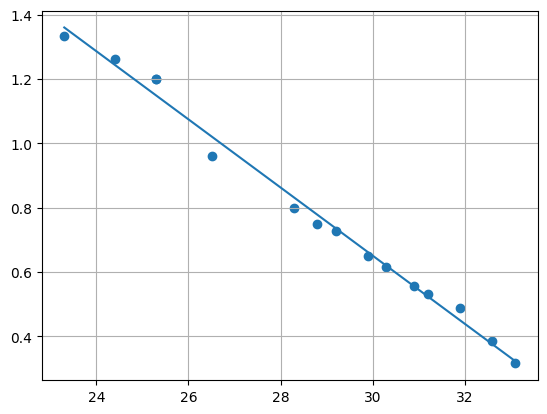

9.446992373249516
**********************
[62.35 63.45 63.7  63.75 64.95 67.15 68.35 68.5  70.05 70.15 72.65 73.3
 74.65 79.4  86.4 ] [0.75       0.79166667 0.83333333 0.83333333 1.04166667 1.25
 1.33333333 1.375      1.54166667 1.625      1.79166667 1.875
 2.04166667 2.58333333 3.16666667]
**********************


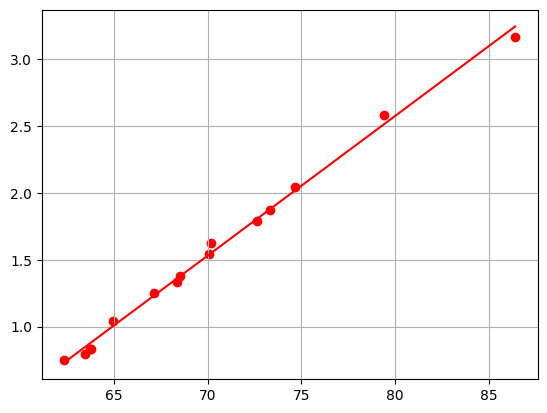

f0:  9.446992373249516
f1:  9.569266245206757
0.026630187951482566
0.08148100819557336
45.60059324551622 45.78418402597852
150.62158447928167 3198.4922343803546 9.446992373249516 9.569266245206757
media pesata tra le due focali: 9.563767153407932


In [ ]:

def f2(x,y):
    return (x+1/y)

def f3(x,y):
    return -1/x

def GERROR(x,y):
    return x/y

def invg(x,y):
    return 1/y

y2min = np.array([2.1,0.9,1.9,3.7,1.4,2.3,3.0,2.0,1.1,1.5,0.9,1.3,0.8,1.7,0.8])
y2max = np.array([2.4,1.1,2.0,3.9,1.8,2.6,3.2,2.3,1.4,1.8,1.1,1.7,1.0,2.0,1.1])
pstar = np.sort(np.array([31.2,25.3,30.3,33.1,28.8,31.9,32.6,30.9,26.5,29.2,25.3,28.3,23.3,29.9,24.4]))
qstarmin = np.array([72.3,62.9,69.3,84.0,66.5,73.3,78.4,71.7,63.6,67.4,62.9,65.9,61.7,68.8,62.4])
qstarmax = np.array([74.3,64.6,71.0,88.8,70.2,76.0,80.4,73.6,66.3,69.6,64.5,68.4,63.0,71.3,64.5])


qmedia = ((qstarmax + qstarmin)/2)
#print("unsorted q:", qmedia)
qmedia = np.sort(qmedia)
ymedia = (y2min + y2max)/2
#ymediaU = ymedia
#print("unsorted y:",ymedia)
ymedia = np.sort(ymedia)
#GU = ymediaU/1.2
#print("G unsorted: ", GU)
G = ymedia/1.2
invG = 1/G
#invGU = 1/GU

l=[]
for y in ymedia:
    l.append(tiam.prop_no_cor(GERROR,y,1.2,0.1,0.1))
print("errori G: ",l)

#print("1/G unsorted: ",invGU)
print("qmedia: ", qmedia)
print("ymedia: ", ymedia)
print("G: ", G)
print("1/G: ", invG)

"""
DGU =  0.1/1.2 + ymediaU*0.1/(1.2**2) 
print("Delta G unsorted: ", DGU)

DINVU = 0.1/ymediaU + 1.2*0.1/(ymediaU**2)
print("Delta 1/G unsorted",DINVU)"""


slope0, intercept0, cov_matrix0 = tiam.fit_lineare(pstar,invG)
slope1, intercept1, cov_matrix1 = tiam.fit_lineare(qmedia,G)

plt.grid()
plt.scatter(pstar,invG)
print("**********************")
print(pstar,invG)
print("**********************")
plt.plot(pstar,slope0*pstar + intercept0)
plt.savefig("pstarinvg.png")
plt.show()

f0 = -1/slope0
print(f0)
x0 = f0*intercept0 + f0

plt.grid()
print("**********************")
print(qmedia,G)
plt.scatter(qmedia,G,c="r")
print("**********************")
plt.plot(qmedia,slope1*qmedia + intercept1,c="r")
plt.savefig("qmediafit.png")
plt.show()


f1 = 1/slope1
x1 = -f1-intercept1*f1

print("f0: ", f0)
print("f1: ", f1)

err_INVF = tiam.prop_no_cor(f3,slope0,1,cov_matrix0[0][0],0)
print(np.sqrt(err_INVF))
err_f0 = np.sqrt(tiam.prop_no_cor(f2,intercept0,-1/slope0,cov_matrix0[1][1],np.sqrt(err_INVF)))
print((err_f0))

print(x0,x1)

w_0 = 1/(err_f0)**2

err_f1 = np.sqrt(tiam.prop_no_cor(f3, slope1, 1, cov_matrix1[0][0], 0))
w_1 = 1/(err_f1)**2

print(w_0,w_1,f0,f1)
med_w = (w_0*f0 + w_1*f1)/(w_0 + w_1)
print('media pesata tra le due focali:', med_w)


focale0 = f0
focale1 = f1

In [12]:
# Propagazione degli errori
q1 = 3.826
incq1 = 0.081
m1 = 0.105
incm1 = 0.003

def f1(x,y):
    return (x+1)/(-y)

incf1 = tiam.prop_no_cor(f1,q1,m1,incq1,incm1)
print(incf1)

q2 = -5.784
incq2 = 0.130
m2 = 0.104
incm2 = 0.002

def f2(x,y):
    return (-x-1)/(y)

incf2 = tiam.prop_no_cor(f2,q2,incq2,m2,incm2)
print(incf2)

# Consistenza tra le focali
print(tiam.consistenza_statistica(focale0,focale1,0.272,0.185))

allah = 1/pstar + 1/qmedia
print(allah,1/9.615)




1.5230197418802767
0.9800664148489084
a:  0.9446973585597465
(True, 0.9446973585597465)
[0.05895695 0.05674405 0.05522428 0.05521197 0.05313231 0.05022772
 0.0493528  0.04884512 0.04772033 0.04725847 0.04612708 0.04569385
 0.04474381 0.04326931 0.04178555] 0.10400416016640665
